In [24]:
#Question 1
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import env

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
#URL function
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [21]:
#Declare the database and url
database = 'zillow'

url = get_db_url(host, user, password, database)

In [22]:
#Create the SQL query
query = '''
        SELECT prop.*,
        predictions_2017.logerror,
        predictions_2017.transactiondate,
        air.airconditioningdesc,
        arch.architecturalstyledesc,
        build.buildingclassdesc,
        heat.heatingorsystemdesc,
        land.propertylandusedesc,
        story.storydesc,
        type.typeconstructiondesc
        FROM properties_2017 prop
        JOIN (
            SELECT parcelid, MAX(transactiondate) AS max_transactiondate
            FROM predictions_2017
            GROUP BY parcelid
            ) pred USING(parcelid)
        JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
                          AND pred.max_transactiondate = predictions_2017.transactiondate
        LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
        LEFT JOIN storytype story USING(storytypeid)
        LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
        WHERE propertylandusedesc = "Single Family Residential"
            AND transactiondate <= '2017-12-31'
            AND prop.longitude IS NOT NULL
            AND prop.latitude IS NOT NULL
        '''

In [23]:
#Read in the dataframe
df = pd.read_sql(query, url)

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,781532,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,...,"60,374,608,001,014.00",-0.00,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"52,319.00","1,496,887.68","859,431.03",349.00,"757,581.00","1,500,095.00","2,241,247.50","2,982,270.00"
parcelid,"52,319.00","12,996,817.91","3,350,951.35","10,711,855.00","11,510,167.50","12,578,254.00","14,130,361.00","167,687,839.00"
airconditioningtypeid,"13,615.00",2.44,3.85,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,70.00,7.10,2.67,2.00,7.00,7.00,7.00,21.00
basementsqft,47.00,678.98,711.83,38.00,263.50,512.00,809.50,"3,560.00"
bathroomcnt,"52,319.00",2.30,1.02,0.00,2.00,2.00,3.00,18.00
bedroomcnt,"52,319.00",3.30,0.95,0.00,3.00,3.00,4.00,14.00
buildingqualitytypeid,"33,654.00",6.26,1.72,1.00,5.00,6.00,8.00,12.00
calculatedbathnbr,"52,184.00",2.31,1.02,1.00,2.00,2.00,3.00,18.00
decktypeid,389.00,66.00,0.00,66.00,66.00,66.00,66.00,66.00


<AxesSubplot:xlabel='numberofstories', ylabel='logerror'>

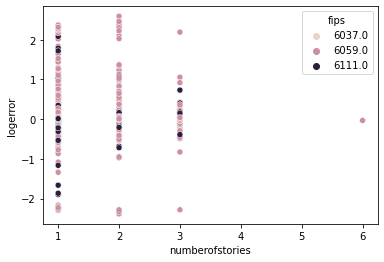

In [25]:
sns.scatterplot(x='numberofstories', y='logerror', data=df, hue='fips')

<AxesSubplot:xlabel='logerror', ylabel='parcelid'>

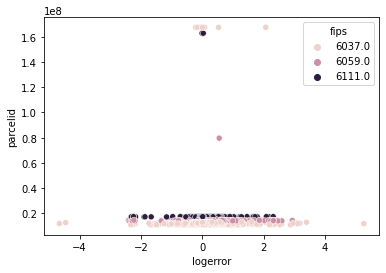

In [26]:
sns.scatterplot(x='logerror', y='parcelid', data=df, hue='fips')

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

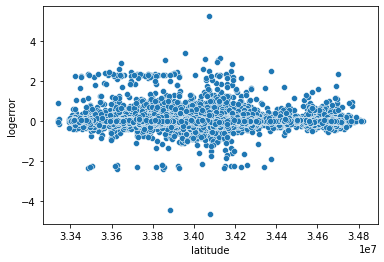

In [27]:
sns.scatterplot(x='latitude', y='logerror', data=df)

<AxesSubplot:xlabel='longitude', ylabel='logerror'>

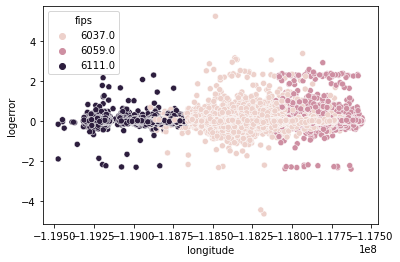

In [28]:
sns.scatterplot(x='longitude', y='logerror', hue='fips', data=df)

<AxesSubplot:xlabel='basementsqft', ylabel='logerror'>

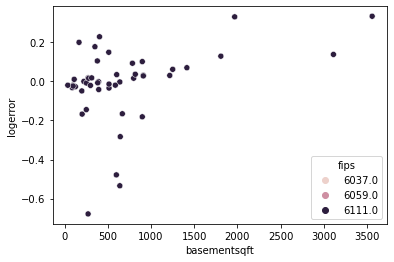

In [29]:
sns.scatterplot(x='basementsqft', y='logerror', data=df, hue='fips')

<AxesSubplot:xlabel='roomcnt', ylabel='logerror'>

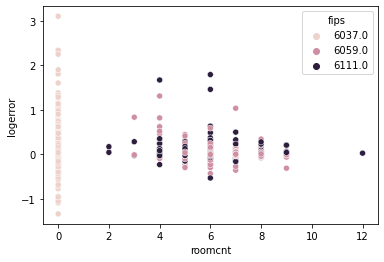

In [40]:
sns.scatterplot(x='roomcnt', y='logerror', data=df[df.taxamount < 1000], hue='fips')